/opt/anaconda3/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


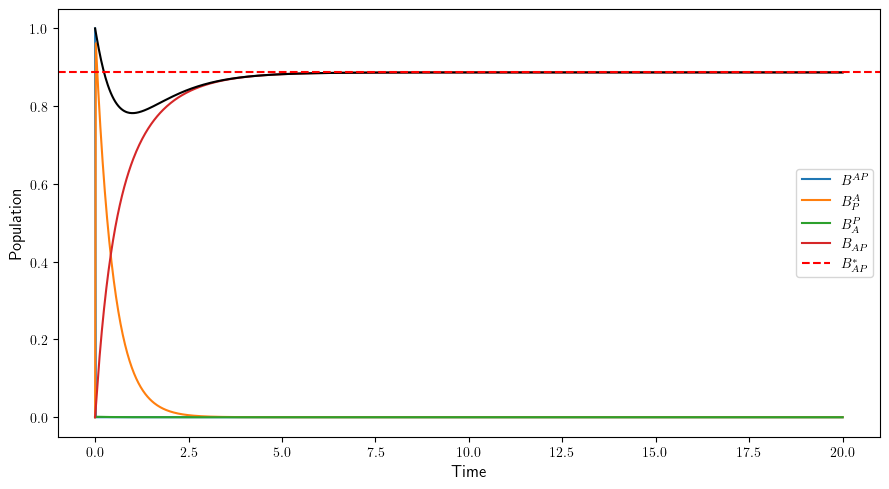

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.rcParams["text.usetex"] = True

# Parameters

#nu=eta

rho1 = 0
rho2 = 0.0
rho3 = 0
rho4 = 0.95
alpha1 = 0.4
alpha2 = 0.4
alpha3 = 0.4
delta2 = 0.6
phi1 = 1e-2
phi2 = 1e-2
phi3 = 1e-2
gamma = 0.3
eta = 0.0001
CC = 0.887
A = 1000
burstsize = 180

P=1e2




params = (rho1, rho2, rho3, rho4, CC, alpha1, alpha2, alpha3, phi1, phi2, phi3, gamma, delta2, eta, A, burstsize)

def system(t, y):
    B1, B2, B3, B4, P = y
    BA = B1 + B2 + B3 + B4
    dB1 = rho1 * B1 * (1 - BA / CC) - alpha1 * A * B1 - phi1 * P * B1
    dB2 = rho2 * B2 * (1 - BA / CC) + alpha1 * A * B1 + alpha2*A*B3 -(phi2+phi3)*P * B2 - delta2 * (A / (1 + A)) *B2
    dB3 = rho3 * B3 * (1 - BA / CC)  + phi1 * P * B1 - (alpha2+alpha3) * A * B3+phi2*P*B2 - gamma*(P/(1+P))*B3
    dB4 = rho4 * B4 * (1 - BA / CC) + alpha3 * A * B3 + phi3 * P * B2 - eta * ((P + A) / (1 + P + A)) * B4
    dP  = burstsize * (gamma * (P / (1 + P)) * B3 + eta * (P / (1 + P)) * B4) - (phi1*B1 + (phi2+phi3)*B3)*P
    return np.array([dB1, dB2, dB3, dB4, dP])
t_final = 20
t_eval = np.linspace(0, t_final, 1000)
y0 = [1, 0.00, 0.00, 0.00, 1e2]

# Solve the full system
sol = solve_ivp(system, [0, t_final], y0, t_eval=t_eval, method='RK45', rtol=1e-14, atol=1e-14)
t = sol.t
B1, B2, B3, B4, P = sol.y

plt.figure(figsize=(9, 5))
plt.plot(t, B1, label=r'$B^{AP}$')
plt.plot(t, B2, label=r'$B^A_P$')
plt.plot(t, B3, label=r'$B^P_A$')
plt.plot(t, B4, label=r'$B_{AP}$')
plt.plot(t, B1+B2+B3+B4, 'black')
threshold = 1 / (1/CC + eta/rho4)
plt.axhline(threshold, color='r', linestyle='--', label=r'$B_{AP}^*$')

plt.xlabel(r'Time', fontsize=12)
plt.ylabel(r'Population', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
#plt.xlim(0,10)

plt.tight_layout()
plt.savefig('pseudo_equilibria.pdf')
plt.show()